This Notebook covers the simplied version of Tensorflow documentation and its workings. Learn Tensflow 

In [3]:
# import important libraries
import tensorflow as tf
import warnings
import numpy as np
print("Tensorflow Version", tf.__version__)
warnings.filterwarnings("ignore")

Tensorflow Version 2.12.0


## Tensors

### What are tensors? 
Tensors are multi-dimensional arrays with a uniform type. 
All tensors are immutable

In [5]:
# rank - 0 tensor or scalar: single value with no axes
rank_0 = tf.constant(4)
print(rank_0)

tf.Tensor(4, shape=(), dtype=int32)


In [6]:
# rank - 1 tensor 
rank_1 = tf.constant([2.0, 1.0, 3.0, 4.0])
print(rank_1)

tf.Tensor([2. 1. 3. 4.], shape=(4,), dtype=float32)


Default tensor type is int 32

In [7]:
# rank - 2 tensor 

rank_2 = tf.constant([[1, 0],
                     [2, 3],
                     [4, 5],
                     [6, 7]], dtype = tf.float16)
print(rank_2)

tf.Tensor(
[[1. 0.]
 [2. 3.]
 [4. 5.]
 [6. 7.]], shape=(4, 2), dtype=float16)


In [8]:
# higher dimensional tensors

rank_3 = tf.constant([[[1,2],
                      [2,3]],
                     [[4,5],
                     [6,7]]])
print(rank_3)

tf.Tensor(
[[[1 2]
  [2 3]]

 [[4 5]
  [6 7]]], shape=(2, 2, 2), dtype=int32)


In [9]:
# tensor to numpy array 
rank_1.numpy()

array([2., 1., 3., 4.], dtype=float32)

In [10]:
# or this way
np.array(rank_2)

array([[1., 0.],
       [2., 3.],
       [4., 5.],
       [6., 7.]], dtype=float16)

The base tf.Tensor class requires tensors to be "rectangular" that is, along each axis, every element is the same size.

AO - Arithmetic Operation

In [11]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]])

In [13]:
print(tf.add(a,b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.subtract(a, b), "\n")
print(tf.matmul(a, b), '\n')   # matrix multiplication or dot product

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[0 1]
 [2 3]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [14]:
# you can use normal signs as well 
# dot product
print(a @ b)

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32)


In [16]:
a = [1, 2, 3, 4, 5, 6]  # this is a list 

# how to convert to tensor
b = tf.convert_to_tensor(a)
print(b, "n")

tf.Tensor([1 2 3 4 5 6], shape=(6,), dtype=int32) n


In [18]:
# find the largest value 
print(tf.reduce_max(b), "\n")

# index of the largest value 
print(tf.math.argmax(b), "\n")

tf.Tensor(6, shape=(), dtype=int32) 

tf.Tensor(5, shape=(), dtype=int64) 



### Vocabs

1. Shape: The length (number of elements) of each of the axes of a tensor.
1. Rank: Number of tensor axes. A scalar has rank 0, a vector has rank 1, a matrix is rank 2.
1. Axis or Dimension: A particular dimension of a tensor.
1. Size: The total number of items in the tensor, the product of the shape vector's elements.

In [22]:
print("Type of every element:", b.dtype)
print("Number of axes:", b.ndim)
print("Shape of tensor:", b.shape)

Type of every element: <dtype: 'int32'>
Number of axes: 1
Shape of tensor: (6,)


In [24]:
print("Elements along axis 0 of tensor:", b.shape[0])
print("Elements along the last axis of tensor:", b.shape[-1])
print("Total number of elements: ", tf.size(b).numpy())

Elements along axis 0 of tensor: 6
Elements along the last axis of tensor: 6
Total number of elements:  6


In [25]:
print(rank_2)

tf.Tensor(
[[1. 0.]
 [2. 3.]
 [4. 5.]
 [6. 7.]], shape=(4, 2), dtype=float16)


In [33]:
print("Elements along axis 0 of tensor:", rank_2.shape[0])
print("Elements along the last axis of tensor:", rank_2.shape[-1])
print("Total number of elements: ", tf.size(rank_2).numpy())

Elements along axis 0 of tensor: 4
Elements along the last axis of tensor: 2
Total number of elements:  8


In [32]:
print(rank_3)

tf.Tensor(
[[[1 2]
  [2 3]]

 [[4 5]
  [6 7]]], shape=(2, 2, 2), dtype=int32)


In [35]:
print("Elements along axis 0 of tensor:", rank_3.shape[0])
print("Elements along the last axis of tensor:", rank_3.shape[-1])
print("Total number of elements: ", tf.size(rank_2).numpy())

Elements along axis 0 of tensor: 2
Elements along the last axis of tensor: 2
Total number of elements:  8


In [37]:
tf.rank(b), tf.shape(b)

(<tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([6], dtype=int32)>)

### Indexing

Index rules are same as python and numpy

In [38]:
a = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])

In [40]:
print(a[0])
print(a[0].numpy())  # convert the previous output to numpy array 

tf.Tensor(0, shape=(), dtype=int32)
0


In [42]:
print("Everything:", a[:].numpy())
print("Before 4:", a[:4].numpy())
print("From 4 to the end:", a[4:].numpy())
print("From 2, before 7:", a[2:7].numpy())
print("Every other item:", a[::2].numpy())
print("Reversed:", a[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


For higher axes we use the same rule for each axes

In [43]:
print(rank_3)

tf.Tensor(
[[[1 2]
  [2 3]]

 [[4 5]
  [6 7]]], shape=(2, 2, 2), dtype=int32)


In [48]:
print(rank_3[1, 1, 0].numpy())  # we go from higher to lower dimension here

print(rank_3[1, 1, 1].numpy())   

6
7


In [49]:
print(rank_2)

tf.Tensor(
[[1. 0.]
 [2. 3.]
 [4. 5.]
 [6. 7.]], shape=(4, 2), dtype=float16)


In [50]:
# selection comes down from column to row - higher to lower dimension

print("Second row:", rank_2[1, :].numpy())
print("Second column:", rank_2[:, 1].numpy())
print("Last row:", rank_2[-1, :].numpy())
print("First item in last column:", rank_2[0, -1].numpy())
print("Skip the first row:")
print(rank_2[1:, :].numpy(), "\n")

Second row: [2. 3.]
Second column: [0. 3. 5. 7.]
Last row: [6. 7.]
First item in last column: 0.0
Skip the first row:
[[2. 3.]
 [4. 5.]
 [6. 7.]] 



### Reshaping

In [62]:
x = tf.constant([[1], [2], [3]])
print("X is:", x, "\n")
print("Shape:", x.shape, "\n")
print("As list:", x.shape.as_list())  # convert to list 

X is: tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

Shape: (3, 1) 

As list: [3, 1]


In [64]:
reshaped = tf.reshape(x, [1, 3])  # reshaping x from  3 * 1 to 1 * 3 
print(reshaped)
print(reshaped.shape)

tf.Tensor([[1 2 3]], shape=(1, 3), dtype=int32)
(1, 3)


Cast from type to type

In [66]:
the_f64_tensor = tf.constant([2.2, 3.3, 4.4], dtype=tf.float64)
print(the_f64_tensor)

the_f16_tensor = tf.cast(the_f64_tensor, dtype=tf.float16)
print(the_f16_tensor)

# Now, cast to an uint8 and lose the decimal precision
the_u8_tensor = tf.cast(the_f16_tensor, dtype=tf.uint8)
print(the_u8_tensor)

tf.Tensor([2.2 3.3 4.4], shape=(3,), dtype=float64)
tf.Tensor([2.2 3.3 4.4], shape=(3,), dtype=float16)
tf.Tensor([2 3 4], shape=(3,), dtype=uint8)


### Broadcasting
Under certain conditions, smaller tensors are "stretched" automatically to fit larger tensors when running combined operations on them.

In [67]:
x = tf.constant([1, 2, 3])
y = tf.constant(2)
z = tf.constant([2, 2, 2])

# All of these are the same computation
print(tf.multiply(x, 2))                    # x is being streched like [1, 1, 2]
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


In [68]:
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)      # this is compatible because 3 * 1 and 1 * 4 are possible.

print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


### Ragged Tensors 

A tensor with variable numbers of elements along some axis is called "ragged". Use tf.ragged.RaggedTensor for ragged data.

In [ ]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

In [71]:
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


In [72]:
print(ragged_tensor.shape)   # axes with unknown lengths

(4, None)


### String tensors

tf.string is a dtype, which is to say you can represent data as strings (variable-length byte arrays) in tensors.

The strings are atomic and cannot be indexed the way Python strings are. The length of the string is not one of the axes of the tensor.

In [73]:
scalar_string_tensor = tf.constant("Gray wolf")
print(scalar_string_tensor) 

tf.Tensor(b'Gray wolf', shape=(), dtype=string)


In the above printout the b prefix indicates that tf.string dtype is not a unicode string, but a byte-string.

In [74]:
# If you have three string tensors of different lengths, this is OK.
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "Lazy dog"])
# Note that the shape is (3,). The string length is not included.
print(tensor_of_strings)

tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)


In [81]:
# You can use split to split a string into a set of tensors
print(tf.strings.split(scalar_string_tensor, sep=" "))

tf.Tensor([b'Gray' b'wolf'], shape=(2,), dtype=string)


In [82]:
# ...but it turns into a `RaggedTensor` if you split up a tensor of strings,
# as each string might be split into a different number of parts.
print(tf.strings.split(tensor_of_strings))

<tf.RaggedTensor [[b'Gray', b'wolf'], [b'Quick', b'brown', b'fox'], [b'Lazy', b'dog']]>


In [85]:
# string to number 
text = tf.constant("1 10 100")
print(tf.strings.to_number(tf.strings.split(text)))

tf.Tensor([  1.  10. 100.], shape=(3,), dtype=float32)


In [87]:
# string to byte and then to numbers
byte_strings = tf.strings.bytes_split(tf.constant("Duck"))
byte_ints = tf.io.decode_raw(tf.constant("Duck"), tf.uint8)

print(byte_strings)
print(byte_ints)

tf.Tensor([b'D' b'u' b'c' b'k'], shape=(4,), dtype=string)
tf.Tensor([ 68 117  99 107], shape=(4,), dtype=uint8)


In [88]:
# Or split it up as unicode and then decode it
unicode_bytes = tf.constant("アヒル 🦆")
unicode_char_bytes = tf.strings.unicode_split(unicode_bytes, "UTF-8")
unicode_values = tf.strings.unicode_decode(unicode_bytes, "UTF-8")

print("\nUnicode bytes:", unicode_bytes)
print("\nUnicode chars:", unicode_char_bytes)
print("\nUnicode values:", unicode_values)


Unicode bytes: tf.Tensor(b'\xe3\x82\xa2\xe3\x83\x92\xe3\x83\xab \xf0\x9f\xa6\x86', shape=(), dtype=string)

Unicode chars: tf.Tensor([b'\xe3\x82\xa2' b'\xe3\x83\x92' b'\xe3\x83\xab' b' ' b'\xf0\x9f\xa6\x86'], shape=(5,), dtype=string)

Unicode values: tf.Tensor([ 12450  12498  12523     32 129414], shape=(5,), dtype=int32)


### Sparse Tensors

Sometimes, your data is sparse, like a very wide embedding space. TensorFlow supports tf.sparse.SparseTensor and related operations to store sparse data efficiently


In [90]:
# Sparse tensors store values by index in a memory-efficient manner
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],     # location of non zero values 
                                       values=[1, 2],                # actual value on non-zero indices
                                       dense_shape=[3, 4])           # Shape of actual dense tensor
print(sparse_tensor, "\n")

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 



In [91]:
# You can convert sparse tensors to dense
print(tf.sparse.to_dense(sparse_tensor))

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)


In [95]:
x = tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4])

In [97]:
tf.sparse.to_dense(x)    # conver to dense_shape format [3, 4]

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 0, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 0]], dtype=int32)>

## Variables

A `tf.Variable` represents a tensor whose value can be changed by running ops on it. Specific ops allow you to read and modify the values of this tensor. Higher level libraries like `tf.keras` use `tf.Variable` to store model parameters. Variables can be all kinds of types, just like tensors

In [98]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)

In [99]:
print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

Shape:  (2, 2)
DType:  <dtype: 'float32'>
As NumPy:  [[1. 2.]
 [3. 4.]]


In [100]:
print("A variable:", my_variable)
print("\nViewed as a tensor:", tf.convert_to_tensor(my_variable))
print("\nIndex of highest value:", tf.math.argmax(my_variable))

A variable: <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

Viewed as a tensor: tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)

Index of highest value: tf.Tensor([1 1], shape=(2,), dtype=int64)


Most tensor operations work on variables as expected, although variables cannot be reshaped.

In [101]:
# This creates a new tensor; it does not reshape the variable.
print("\nCopying and reshaping: ", tf.reshape(my_variable, [1,4]))


Copying and reshaping:  tf.Tensor([[1. 2. 3. 4.]], shape=(1, 4), dtype=float32)


In [105]:
a = tf.Variable([2.0, 3.0])
a

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([2., 3.], dtype=float32)>

In [110]:
# assign new values
a.assign([3, 4]) 
a

<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([3., 4.], dtype=float32)>

In [111]:
# other ways to assign 
print(a.assign_add([2,3]).numpy())  
print(a.assign_sub([7,9]).numpy())   # substraction is happening on new value after addition

[5. 7.]
[-2. -2.]


In [107]:
# this will give error as the shape can't be changed
a.assign([1.0, 2.0, 3.0])

ValueError: Cannot assign value to variable ' Variable:0': Shape mismatch.The variable shape (2,), and the assigned value shape (3,) are incompatible.

In [113]:
my_tensor

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [112]:
a = tf.Variable(my_tensor, name="Mark")
# A new variable with the same name, but different value
# Note that the scalar add is broadcast
b = tf.Variable(my_tensor + 1, name="Mark")

print(a)
print(b)

<tf.Variable 'Mark:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>
<tf.Variable 'Mark:0' shape=(2, 2) dtype=float32, numpy=
array([[2., 3.],
       [4., 5.]], dtype=float32)>


For better performance, TensorFlow will attempt to place tensors and variables on the fastest device compatible with its dtype. This means most variables are placed on a GPU if one is available. It's possible to set the location of a variable or tensor on one device and do the computation on another device. This will introduce delay, as data needs to be copied between the devices.

## Automatic Differentiation and Gradients

In mathematics and computer algebra, automatic differentiation (auto-differentiation, autodiff, or AD), also called algorithmic differentiation, computational differentiation,[1][2] is a set of techniques to evaluate the partial derivative of a function specified by a computer program.

Automatic differentiation exploits the fact that every computer program, no matter how complicated, executes a sequence of elementary arithmetic operations (addition, subtraction, multiplication, division, etc.) and elementary functions (exp, log, sin, cos, etc.). By applying the chain rule repeatedly to these operations, partial derivatives of arbitrary order can be computed automatically, accurately to working precision, and using at most a small constant factor of more arithmetic operations than the original program.

**Automatic differentiation is useful for implementing machine learning algorithms such as backpropagation for training neural networks.**

In [120]:
import matplotlib.pyplot as plt

TensorFlow provides the `tf.GradientTape` API for automatic differentiation; that is, computing the gradient of a computation with respect to some inputs, usually `tf.Variables`. TensorFlow "records" relevant operations executed inside the context of a `tf.GradientTape` onto a "tape". TensorFlow then uses that tape to compute the gradients of a "recorded" computation using reverse mode differentiation.

#### Example 1

In [126]:
x = tf.Variable(3.0)

with tf.GradientTape() as g:
    g.watch(x)               # allows you control what to watch 
    print(g.watch(x))
    y = x ** 2
    dy_dx = g.gradient(y, x)
    print(dy_dx)

None
tf.Tensor(6.0, shape=(), dtype=float32)


#### Example 2

In [129]:
w = tf.Variable(tf.random.normal((3, 2)), name='w')
b = tf.Variable(tf.zeros(2, dtype=tf.float32), name='b')
x = [[1., 2., 3.]]

with tf.GradientTape() as tape:
    y = x @ w + b
    loss = tf.reduce_mean(y ** 2)

[dl_dw, dl_db] = tape.gradient(loss, [w, b])

# gradient with respect to each source has the shape of the source
print(dl_dw)
print(dl_db)

tf.Tensor(
[[ 4.373988   5.6196575]
 [ 8.747976  11.239315 ]
 [13.121964  16.858973 ]], shape=(3, 2), dtype=float32)
tf.Tensor([4.373988  5.6196575], shape=(2,), dtype=float32)


#### Example 3

In [131]:
layer = tf.keras.layers.Dense(2, activation = 'relu')
x = tf.constant([[1., 2., 3.]])

with tf.GradientTape() as tape:
    
    # forward pass 
    y = layer(x)
    loss = tf.reduce_mean(y**2)
    
# Calculate gradients with respect to every trainable variable   
gradients = tape.gradient(loss, layer.trainable_variables)

In [133]:
for var, g in zip(layer.trainable_variables, gradients):
    print(f'{var.name}, shape: {g.shape}')

dense_1/kernel:0, shape: (3, 2)
dense_1/bias:0, shape: (2,)


#### Example 4 
Higher order derivatives by nesting

In [137]:
x = tf.constant(5.0)

with tf.GradientTape() as g:
    g.watch(x)
    with tf.GradientTape() as gg:
        gg.watch(x)
        y = x * x
    dy_dx = gg.gradient(y, x) # dy_dx = 2 * x 
d2y_d2x = g.gradient(dy_dx, x) # d2y_dx2 = 2 

print(dy_dx)
print(d2y_d2x)

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


### Controlling what the tape watches

The default behavior is to record all operations after accessing a trainable tf.Variable. The reasons for this are:

1. The tape needs to know which operations to record in the forward pass to calculate the gradients in the backwards pass.
1. The tape holds references to intermediate outputs, so you don't want to record unnecessary operations.
1. The most common use case involves calculating the gradient of a loss with respect to all a model's trainable variables.

In [138]:
# A trainable variable
x0 = tf.Variable(3.0, name='x0')

# Not trainable
x1 = tf.Variable(3.0, name='x1', trainable=False)

# Not a Variable: A variable + tensor returns a tensor.
x2 = tf.Variable(2.0, name='x2') + 1.0

# Not a variable
x3 = tf.constant(3.0, name='x3')

with tf.GradientTape() as tape:
    y = (x0**2) + (x1**2) + (x2**2)

grad = tape.gradient(y, [x0, x1, x2, x3])

# returns values for only trainable variables
for g in grad:
    print(g)

tf.Tensor(6.0, shape=(), dtype=float32)
None
None
None


In [140]:
# what variables are being watched
[var.name for var in tape.watched_variables()]

['x0:0']

In [145]:
# how to control watch 
x0 = tf.Variable(0.0)
x1 = tf.Variable(10.0)

with tf.GradientTape(watch_accessed_variables = False) as tape:
    tape.watch(x1)
    y = x0 **2 + x1 ** 4

gradx0, gradx1 = tape.gradient(y, [x0, x1])

In [146]:
print(gradx0)    # since x0 is not being watched so there is no gradient for it 
print(gradx1)

None
tf.Tensor(4000.0, shape=(), dtype=float32)


Using `persistence = True`

In [147]:
x = tf.constant([1, 3.0])
with tf.GradientTape() as tape:
    tape.watch(x)
    y = x * x
    z = y * y

print(tape.gradient(z, x).numpy())

[  4. 108.]


In [153]:
# this code will give error 
# print(tape.gradient(y, x).numpy())

In above example we don't have `persitence = True` which means if you call the `tape.gradient` on y with respect x then it will give error.

In [149]:
x = tf.constant([1, 3.0])
with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    y = x * x
    z = y * y

print(tape.gradient(z, x).numpy())

[  4. 108.]


In [151]:
# this won't give error 
print(tape.gradient(y, x).numpy())

[2. 6.]


In [154]:
del tape   # Drop the reference to the tape

A gradient is fundamentally an operation on a scalar.
If you ask for the gradient of multiple targets, the result for each source is:
* The gradient of the sum of the targets, or equivalently
* The sum of the gradients of each target.

In [157]:
x = tf.Variable(2.0)
with tf.GradientTape(persistent=True) as tape:
    y0 = x**2
    y1 = 1 / x

print(tape.gradient(y0, x).numpy())
print(tape.gradient(y1, x).numpy())

4.0
-0.25


In [156]:
x = tf.Variable(2.0)
with tf.GradientTape() as tape:
    y0 = x**2
    y1 = 1 / x

print(tape.gradient({'y0': y0, 'y1': y1}, x).numpy())

3.75


In [160]:
x = tf.linspace(-10.0, 10.0, 200+1)

with tf.GradientTape() as tape:
    tape.watch(x)
    y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor(
[4.53958055e-05 5.01696668e-05 5.54454418e-05 6.12759977e-05
 6.77195421e-05 7.48406237e-05 8.27104086e-05 9.14074990e-05
 1.01019003e-04 1.11640831e-04 1.23379359e-04 1.36351780e-04
 1.50687614e-04 1.66530372e-04 1.84037970e-04 2.03385585e-04
 2.24766336e-04 2.48393306e-04 2.74502818e-04 3.03354871e-04
 3.35237681e-04 3.70468944e-04 4.09399363e-04 4.52417444e-04
 4.99951013e-04 5.52473008e-04 6.10506395e-04 6.74626906e-04
 7.45472440e-04 8.23745097e-04 9.10221192e-04 1.00575748e-03
 1.11129810e-03 1.22788746e-03 1.35667447e-03 1.49892876e-03
 1.65605021e-03 1.82957889e-03 2.02121888e-03 2.23284075e-03
 2.46650935e-03 2.72449688e-03 3.00930650e-03 3.32368701e-03
 3.67066660e-03 4.05357219e-03 4.47605597e-03 4.94213402e-03
 5.45620080e-03 6.02308102e-03 6.64805667e-03 7.33690662e-03
 8.09594616e-03 8.93206056e-03 9.85276420e-03 1.08662304e-02
 1.19813345e-02 1.32077131e-02 1.45557625e-02 1.60367284e-02
 1.76627059e-02 1.94466673e-02 2.14024857e-02 2.35449132e-02
 2.58895941e-

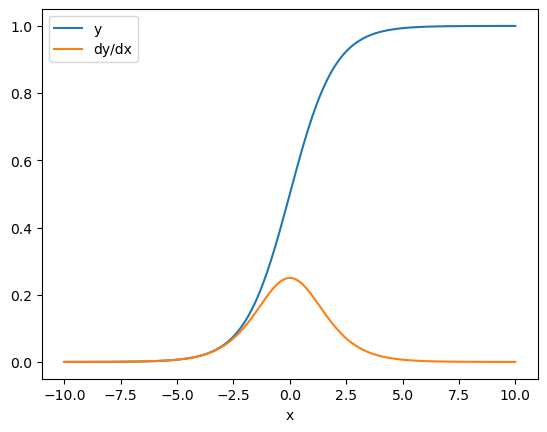

In [166]:
plt.plot(x, y, label = "y")
plt.plot(x, dy_dx, label = 'dy/dx')
plt.legend()
_ = plt.xlabel('x');

When a target is not connected to a source, gradient will return `None`.

##### Mistakes To Avoid
`
* One common error is to inadvertently replace a `tf.Variable` with a `tf.Tensor`, instead of using `Variable.assign` to update the tf.Variable.
* The tape can't record the gradient path if the calculation exits TensorFlow.
* Integers and strings are not differentiable. If a calculation path uses these data types there will be no gradient.
* State stops gradients. When you read from a stateful object, the tape can only observe the current state, not the history that lead to it. A `tf.Variable` has internal state—its value. When you use the variable, the state is read. It's normal to calculate a gradient with respect to a variable, but the variable's state blocks gradient calculations from going farther back. 
* If you attempt to take a gradient through a float op that has no gradient registered the tape will throw an error instead of silently returning None. This way you know something has gone wrong.

For example:

In [168]:
x0 = tf.Variable(3.0)
x1 = tf.Variable(0.0)

with tf.GradientTape() as tape:
  # Update x1 = x1 + x0.
  x1.assign_add(x0)
  # The tape starts recording from x1.
  y = x1**2   # y = (x1 + x0)**2

# This doesn't work.
print(tape.gradient(y, x0))   #dy/dx0 = 2*(x1 + x0)

None


In [170]:
x = tf.Variable([2., 2.])
y = tf.Variable(3.)

with tf.GradientTape() as tape:
    z = y**2
    
# z and x are unconnected gradients it will return none
print(tape.gradient(z, x))    

None


In [171]:
x = tf.Variable([2., 2.])
y = tf.Variable(3.)

with tf.GradientTape() as tape:
    z = y**2
    
# z and x are unconnected gradients it will return zero in case you want that 
print(tape.gradient(z, x, unconnected_gradients=tf.UnconnectedGradients.ZERO))   

tf.Tensor([0. 0.], shape=(2,), dtype=float32)
